# Lesson 1 Hands On



## Complete simple linear regression in Python and test for assumptions. 

* Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import  statsmodels.api as sm

In [2]:
# Read in the data

height = pd.read_csv('heights.csv')

In [3]:
heights = pd.DataFrame(height)

In [4]:
heights

AM_Height  PM_Height
0     1728.75    1720.25
1     1538.25    1528.50
2     1462.25    1452.50
3     1782.50    1776.50
4     1671.00    1667.00
5     1581.75    1571.00
6     1673.75    1664.50
7     1721.75    1708.50
8     1646.50    1636.00
9     1793.75    1781.75
10    1825.25    1814.00
11    1801.50    1787.00
12    1742.50    1729.75
13    1720.50    1711.50
14    1728.25    1717.25
15    1753.75    1742.75
16    1725.50    1716.75
17    1598.00    1592.25
18    1756.25    1747.00
19    1674.00    1662.50
20    1688.75    1677.00
21    1688.75    1681.00
22    1620.75    1613.50
23    1679.00    1668.25
24    1557.25    1550.25
25    1704.50    1696.50
26    1632.75    1619.00
27    1587.00    1581.50
28    1598.75    1590.50
29    1592.25    1583.50
30    1719.50    1709.25
31    1807.50    1795.00
32    1624.00    1619.50
33    1705.25    1694.50
34    1692.75    1686.00
35    1795.25    1782.00
36    1643.50    1628.75
37    1677.25    1668.25
38    1647.75    1641.50
39    1620.00    1608.25
40    1727.50    1721.25

# Test Assumptions

* Test for linear relationship between x and y and normal distribution.  

In [5]:
# Using Seaborn as sns
sns.pairplot(heights)

The Bar chart shows the data is in general, normally distributed and the scatterplots show the data have a strong positive relationship.

Also, run a barchart with the normal distribution curve on it. 

In [6]:
sns.distplot(heights['AM_Height'])

C:\Users\chris\AppData\Local\Temp\ipykernel_27148\3300282255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights['AM_Height'])


<AxesSubplot: xlabel='AM_Height', ylabel='Density'>

In [7]:
sns.distplot(heights['PM_Height'])

C:\Users\chris\AppData\Local\Temp\ipykernel_27148\3083221884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights['PM_Height'])


<AxesSubplot: xlabel='PM_Height', ylabel='Density'>

### We can observe above the data appear normally distributed. They are not perfect bell curves but they look pretty close. 

# Next, testing for homoscedasticity

* Create a Model, then run the test

In [14]:
# Create the variables in order to create the model
x = heights['AM_Height']
y = heights['PM_Height']

In [15]:
# Create the model using OLS function from statsmodels
model = sm.OLS(y,x).fit()

In [10]:
# To test for homoscedasticity calculate the residuals

pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

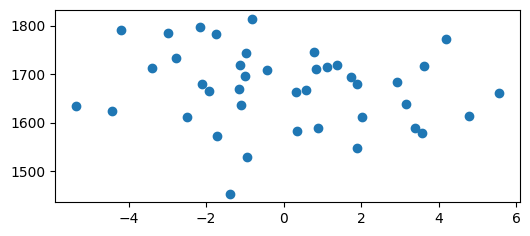

In [11]:
# scatter plot showing some heteroscedasticity

fig, ax = plt.subplots(figsize = (6, 2.5))
_ = ax.scatter(residual, pred_val)

In [16]:
# Using statsmodels check the statistics against the scatterplot

# use the function diagnostic.het_breuschpagan

sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.281807808596078, nan, 29.14523614469984, 3.3000372410765926e-06)

* The the p value is less than .05 so this data is statistically significant. 

In [17]:
# Testing for homoscedasticity using the Harvey Collier test

sms.linear_harvey_collier(model)

TtestResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713, df=37)

### Based on the Harvey Collier test the p value is not significant

## Test for Mulitcollinearity

In [19]:
heights.corr()

AM_Height  PM_Height
AM_Height   1.000000   0.999466
PM_Height   0.999466   1.000000

## Screening for Outliers

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

# The numbered outlier "23" would be a data point to remove. The outliers are labeled

In [21]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal   
0        0.085810  0.007499        0.532882  0.025727         0.086594  \
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                   5.17e-114
Time:                        11:12:48   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""